# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [4]:
# If on colab, uncomment the following lines

! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/master/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

--2021-11-07 18:17:02--  https://raw.githubusercontent.com/girafe-ai/ml-mipt/master/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58374 (57K) [text/plain]
Saving to: ‘car_data.csv.1’

car_data.csv.1      100%[===================>]  57.01K  --.-KB/s    in 0.01s   

2021-11-07 18:17:02 (4.02 MB/s) - ‘car_data.csv.1’ saved [58374/58374]



In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import Pipeline
dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [ ]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,655,86,35,44,110,54,2,119,57,17,121,139,208,137,90,6,1,180,183
1,207,85,42,64,121,55,7,149,46,19,146,167,323,172,85,1,6,179,182
2,229,86,41,64,148,61,5,150,45,19,138,165,333,173,80,5,8,182,185
3,408,86,45,71,155,66,7,146,45,19,144,167,322,176,72,5,6,189,196
4,80,87,46,71,159,66,6,151,44,19,146,175,343,189,73,2,0,186,190
5,539,109,55,96,191,57,6,241,28,26,170,267,857,242,85,8,9,184,184
6,323,98,51,96,203,66,10,188,35,22,157,207,533,231,68,10,1,191,199
7,834,82,36,51,114,53,4,135,50,18,126,150,268,144,86,15,4,181,182
8,602,100,51,109,231,70,11,220,30,25,163,238,722,206,73,11,19,189,198
9,786,107,55,103,213,68,11,219,30,25,172,221,709,216,70,10,7,187,197


Methods `describe` and `info` deliver some useful information.

In [ ]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,428.717668,93.438980,44.650273,81.593807,168.131148,61.775956,8.739526,167.402550,41.260474,20.471767,147.653916,187.245902,432.160291,173.35337,72.367942,6.411658,12.240437,188.905282,195.728597
std,243.196240,8.192172,6.125639,15.846574,33.465707,8.356064,5.186266,32.797377,7.758649,2.548369,14.584403,30.992105,173.701753,32.26412,7.753464,5.041247,8.690781,6.172856,7.330140
min,2.000000,76.000000,34.000000,42.000000,105.000000,47.000000,2.000000,114.000000,26.000000,17.000000,118.000000,131.000000,191.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,227.000000,87.000000,40.000000,70.000000,140.000000,57.000000,7.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,148.00000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,425.000000,92.000000,44.000000,78.000000,165.000000,61.000000,8.000000,156.000000,43.000000,20.000000,145.000000,177.000000,362.000000,172.00000,71.000000,5.000000,11.000000,188.000000,197.000000
75%,643.000000,100.000000,49.000000,98.000000,194.000000,65.000000,10.000000,195.000000,46.000000,22.000000,160.000000,215.000000,573.000000,195.00000,75.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,110.000000,333.000000,138.000000,55.000000,262.000000,59.000000,28.000000,182.000000,320.000000,998.000000,264.00000,135.000000,22.000000,40.000000,206.000000,211.000000


In [ ]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

logistic= LogisticRegressionCV(multi_class='multinomial', solver='saga' ,tol=1e-3,max_iter=500)
pipe = Pipeline([('scale', StandardScaler()),("logistic", logistic)])
param_grid = {
    'logistic__cv': np.arange(1, 10),
}


clf = GridSearchCV(pipe, param_grid = param_grid)
clf.fit(X_train, y_train)
print(clf.best_params_)
pred_y = clf.best_estimator_.predict(X_test)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: k-fold cross-validation requires at least one train/test split 

{'logistic__cv': 3}


In [7]:
from sklearn.metrics import f1_score
print('ACCURACY:{:.2f}'.format(accuracy_score(y_test,pred_y)))
print('F1:{:.2f}'.format(f1_score(y_test,pred_y,average='micro')))

ACCURACY:0.80
F1:0.80


In [8]:
pred_y = clf.best_estimator_.predict_proba(X_test)

In [9]:
! pip install scikit-plot

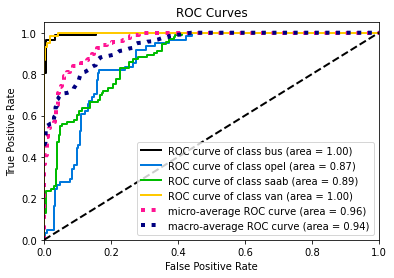

In [10]:
from scikitplot.metrics import plot_roc

plot_roc(y_test,pred_y)


#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

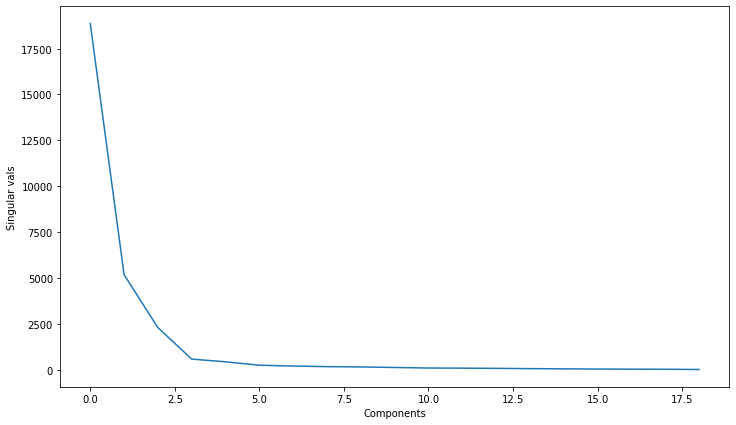

In [11]:
import matplotlib.pyplot as plt

U, S, V = np.linalg.svd(X_train, full_matrices=False)
plt.figure(figsize=(12,7))
plt.plot(S)
plt.xlabel('Components')
plt.ylabel("Singular vals")
plt.show()

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [ ]:
### YOUR CODE HERE

n_components = 15

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [12]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

pca = PCA(n_components=15)

logistic= LogisticRegressionCV(multi_class='multinomial', solver='saga' ,tol=1e-3 )
pipe = Pipeline(steps=[("pca", pca), ("logistic", logistic)])
param_grid = {
    'logistic__cv': np.arange(1, 10),
}

clf = GridSearchCV(pipe, param_grid = param_grid)
clf.fit(X_train, y_train)
pred_y = clf.best_estimator_.predict(X_test)
print(clf.best_params_)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: k-fold cross-validation requires at least one train/test split by setting n_splits=2 or more, got n_splits=1.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: k-fold cross-validation requires at least one train/test split 

{'logistic__cv': 8}


In [13]:
from sklearn.metrics import f1_score

print('ACCURACY:{:.2f}'.format(accuracy_score(y_test,pred_y)))
print('F1:{:.2f}'.format(f1_score(y_test,pred_y,average='micro')))

ACCURACY:0.70
F1:0.70


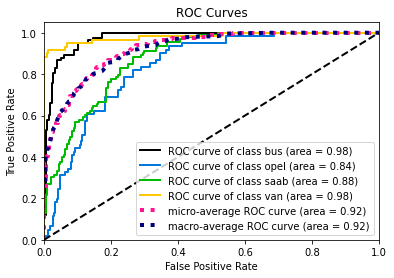

In [14]:
pred_y = clf.best_estimator_.predict_proba(X_test)
from scikitplot.metrics import plot_roc

plot_roc(y_test,pred_y)


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [15]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE
classifier = DecisionTreeClassifier()
pipe = Pipeline([('scale', StandardScaler()),("classifier", classifier)])
param_grid = {
    'classifier__max_depth': range(1,20),
}


clf = GridSearchCV(pipe, param_grid = param_grid)
clf.fit(X_train, y_train)
print(clf.best_params_)
pred_y = clf.best_estimator_.predict(X_test)

{'classifier__max_depth': 19}


In [16]:
print('ACCURACY:{:.2f}'.format(accuracy_score(y_test,pred_y)))
print('F1:{:.2f}'.format(f1_score(y_test,pred_y,average='micro')))

ACCURACY:0.65
F1:0.65


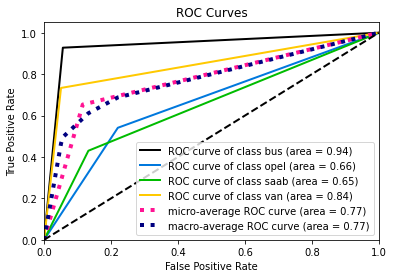

In [17]:
pred_y = clf.best_estimator_.predict_proba(X_test)
from scikitplot.metrics import plot_roc

plot_roc(y_test,pred_y)


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE

In [22]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
acc = []
f1 = []
index =[]
for n in range(2,100,5):
  classifier = DecisionTreeClassifier(max_depth = 6)
  bagging = BaggingClassifier(base_estimator=classifier, n_estimators = n)
  bagging.fit(X_train,y_train)
  y_pred = bagging.predict(X_test)
  index.append(n)
  acc.append(accuracy_score(y_test,y_pred))
  f1.append(f1_score(y_test,y_pred,average = 'macro'))

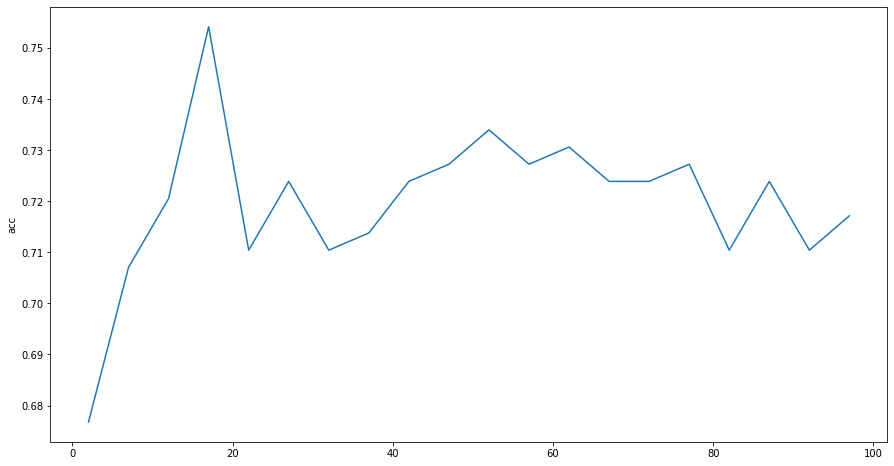

17
0.7542087542087542


In [24]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
plt.plot(index, acc)
plt.ylabel("acc")
plt.show()
print(index[np.argmax(acc)])
print(np.max(acc))

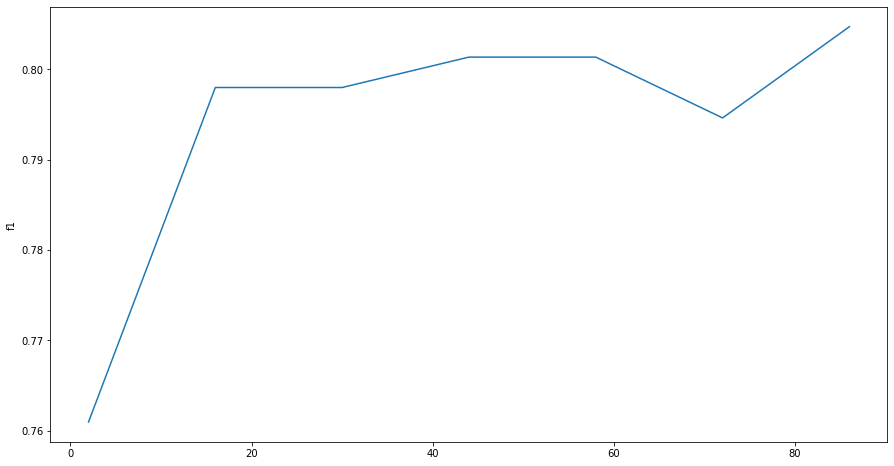

86
0.8063979179275174


In [27]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
plt.plot(index, acc)
plt.ylabel("f1")
plt.show()
print(index[np.argmax(f1)])
print(np.max(f1))

In [25]:
from tqdm import tqdm
acc = []
f1 = []
index =[]
for n in tqdm(range(2,100,14)):
  classifier = LogisticRegressionCV(multi_class='multinomial', solver='saga' ,tol=1e-3, cv=6 )
  bagging = BaggingClassifier(base_estimator=classifier, n_estimators = n)
  bagging.fit(X_train,y_train)
  y_pred = bagging.predict(X_test)
  index.append(n)
  acc.append(accuracy_score(y_test,y_pred))
  f1.append(f1_score(y_test,y_pred,average = 'macro'))

Выходные данные были обрезаны до нескольких последних строк (5000).
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The

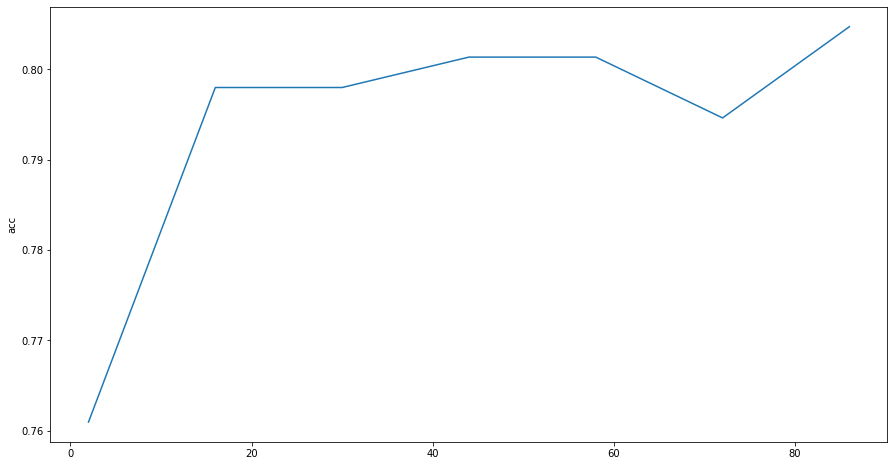

86
0.8047138047138047


In [26]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
plt.plot(index, acc)
plt.ylabel("acc")
plt.show()
print(index[np.argmax(acc)])
print(np.max(acc))

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
plt.plot(index, acc)
plt.ylabel("f1")
plt.show()
print(index[np.argmax(f1)])
print(np.max(acc))

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

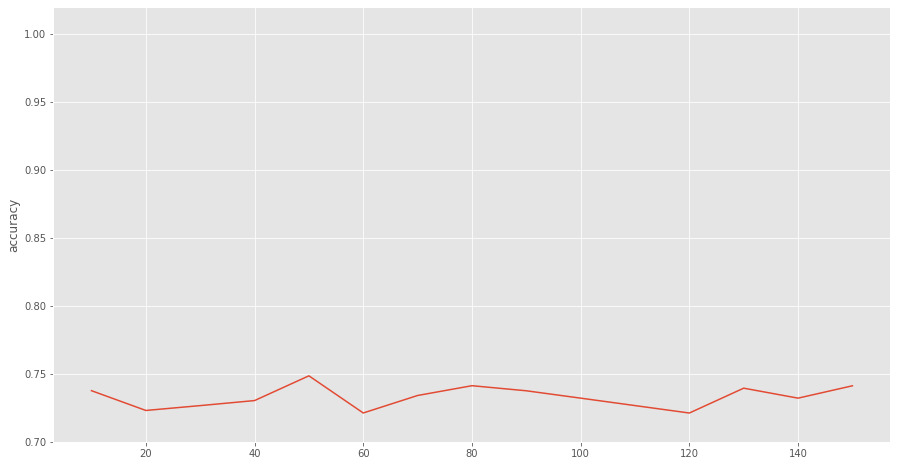

In [ ]:
trees = [10,20,30,40,50,60,70,80,90,100,120,130,140,150]
results = []
for tree in trees:
  rf = RandomForestClassifier(n_estimators=tree)
  results.append(cross_val_score(rf, X_train, y_train, cv=10).mean())
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
plt.plot(trees, results)
ax.set_ylim([0.7,1.02])
plt.ylabel("accuracy")
plt.show()

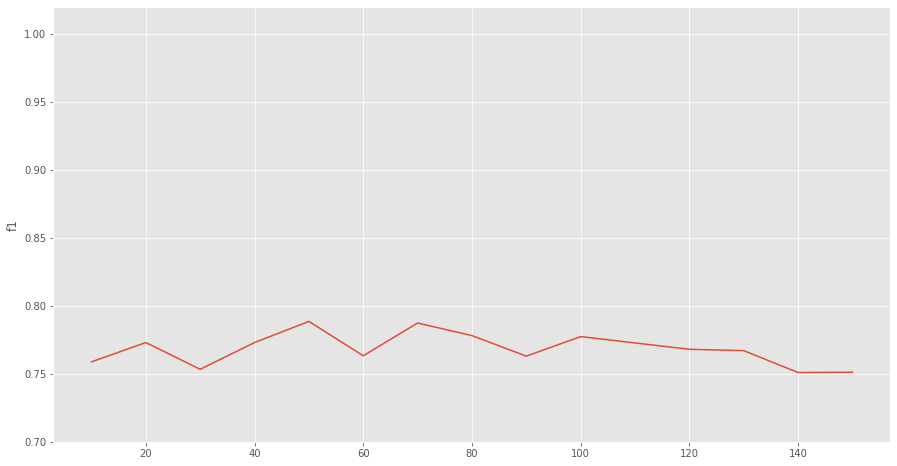

In [ ]:
trees = [10,20,30,40,50,60,70,80,90,100,120,130,140,150]
results = []
for tree in trees:
  rf = RandomForestClassifier(n_estimators=tree)
  rf.fit(X_train,y_train)
  y_pred = rf.predict(X_test)
  results.append(f1_score(y_test,y_pred,average = 'macro'))
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(1, 1, 1)
plt.plot(trees, results)
ax.set_ylim([0.7,1.02])
plt.ylabel("f1")
plt.show()

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
split = skf.split(X_train, y_train)
X_train_new = []
y_train_new = []
size_of_data = []
logistic= LogisticRegressionCV(multi_class='multinomial', solver='saga' ,tol=1e-3,max_iter=500 )
acc = []
f1 = []
for j,i in split:
  if len(X_train_new) == 0:
      X_train_new = X_train[i]
      y_train_new = y_train[i]
  else:
      X_train_new = np.concatenate((X_train_new, X_train[i]),axis = 0)
      y_train_new = np.concatenate((y_train_new, y_train[i]))
  logistic.fit(X_train_new,y_train_new)
  y_pred = logistic.predict(X_test)
  size_of_data.append(X_train_new.shape[0])
  acc.append(accuracy_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred, average='macro'))

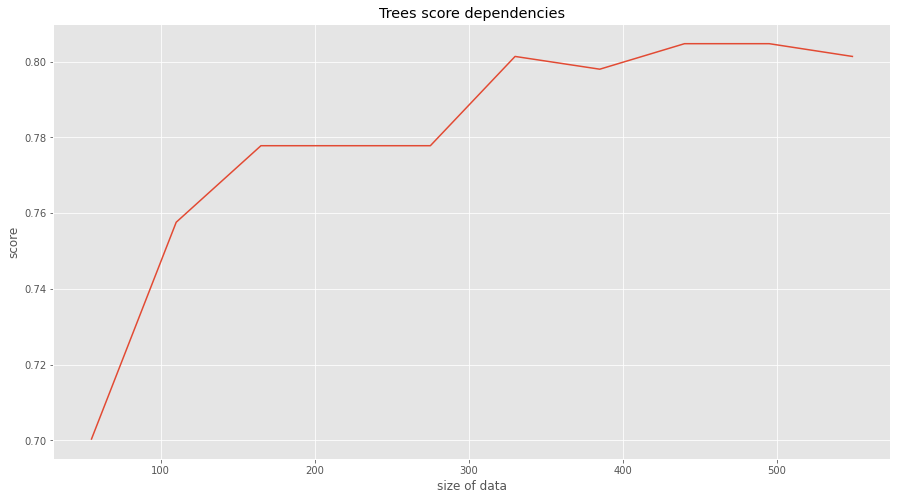

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(size_of_data, acc)
plt.xlabel("size of data")
plt.ylabel("score")
plt.title("Trees score dependencies")
plt.show()

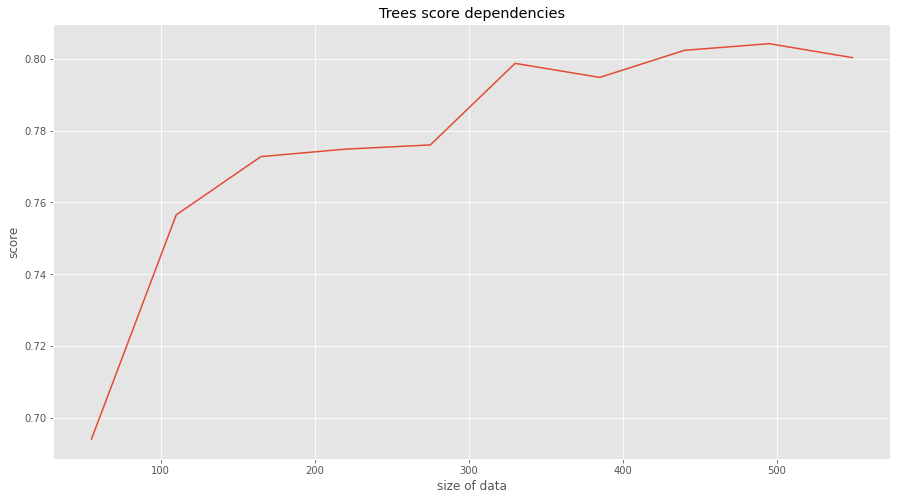

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(size_of_data, f1)
plt.xlabel("size of data")
plt.ylabel("score")
plt.title("Trees score dependencies")
plt.show()

In [ ]:
# YOUR CODE HERE
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
split = skf.split(X_train, y_train)
X_train_new = []
y_train_new = []
size_of_data = []
logistic= DecisionTreeClassifier(max_depth=17)
acc = []
f1 = []
for j,i in split:
  if len(X_train_new) == 0:
      X_train_new = X_train[i]
      y_train_new = y_train[i]
  else:
      X_train_new = np.concatenate((X_train_new, X_train[i]),axis = 0)
      y_train_new = np.concatenate((y_train_new, y_train[i]))
  logistic.fit(X_train_new,y_train_new)
  y_pred = logistic.predict(X_test)
  size_of_data.append(X_train_new.shape[0])
  acc.append(accuracy_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred, average='macro'))

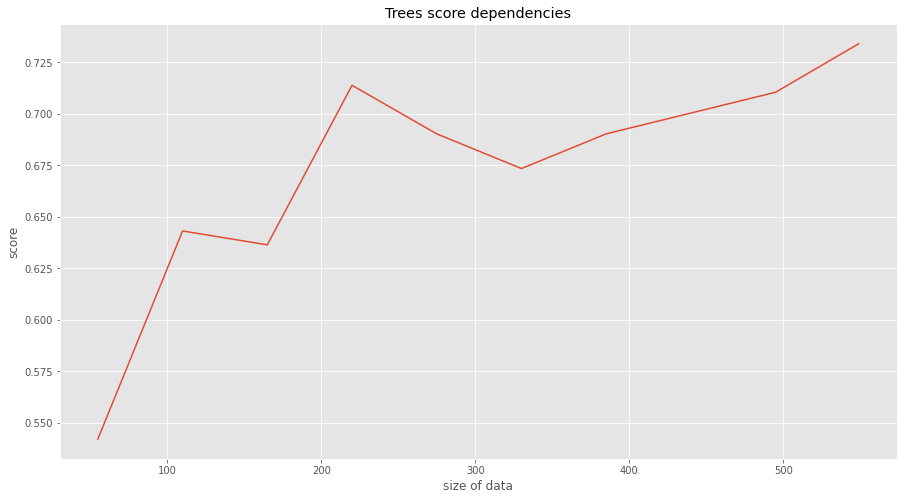

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(size_of_data, acc)
plt.xlabel("size of data")
plt.ylabel("score")
plt.title("Trees score dependencies")
plt.show()

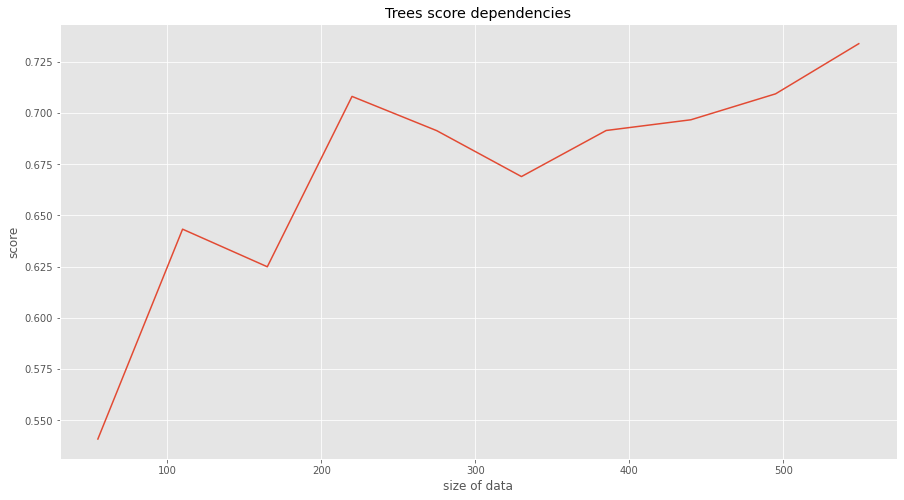

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(size_of_data, f1)
plt.xlabel("size of data")
plt.ylabel("score")
plt.title("Trees score dependencies")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
split = skf.split(X_train, y_train)
X_train_new = []
y_train_new = []
size_of_data = []
logistic = RandomForestClassifier(n_estimators=50)

acc = []
f1 = []
for j,i in split:
  if len(X_train_new) == 0:
      X_train_new = X_train[i]
      y_train_new = y_train[i]
  else:
      X_train_new = np.concatenate((X_train_new, X_train[i]),axis = 0)
      y_train_new = np.concatenate((y_train_new, y_train[i]))
  logistic.fit(X_train_new,y_train_new)
  y_pred = logistic.predict(X_test)
  size_of_data.append(X_train_new.shape[0])
  acc.append(accuracy_score(y_test, y_pred))
  f1.append(f1_score(y_test, y_pred, average='macro'))

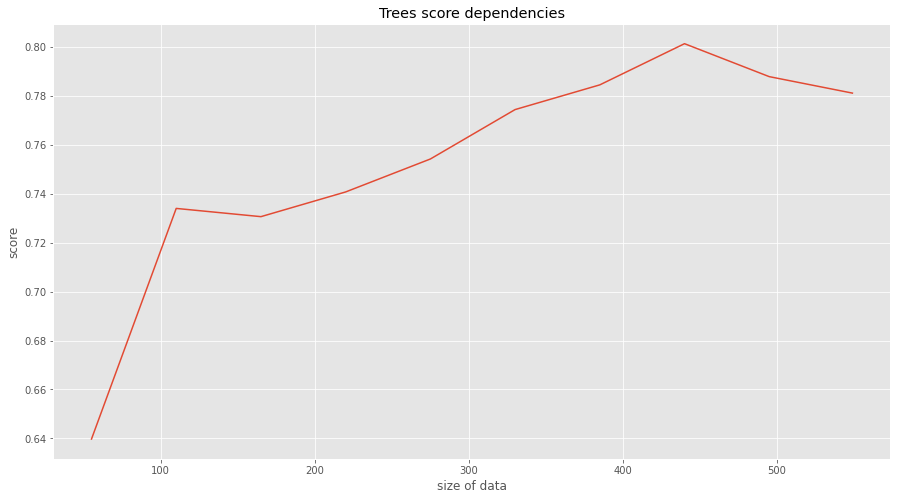

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(size_of_data, acc)
plt.xlabel("size of data")
plt.ylabel("score")
plt.title("Trees score dependencies")
plt.show()

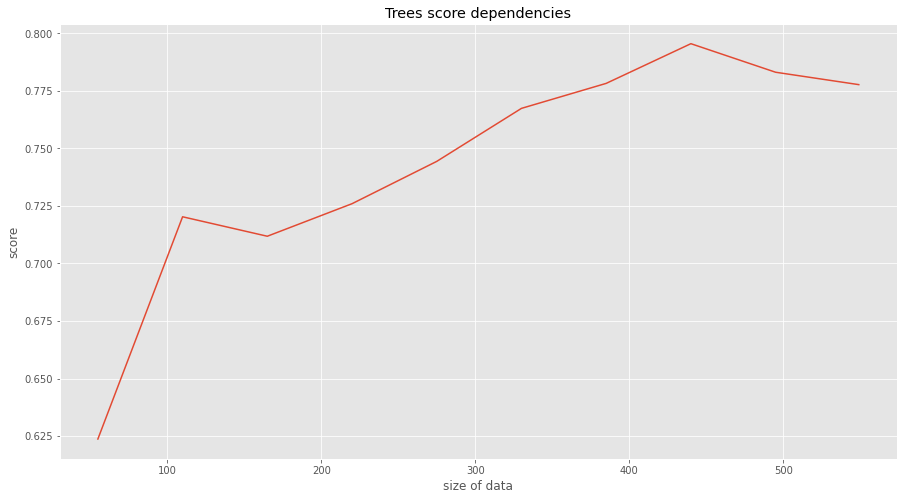

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(size_of_data, f1)
plt.xlabel("size of data")
plt.ylabel("score")
plt.title("Trees score dependencies")
plt.show()